In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif # classification
from sklearn.feature_selection import f_regression, mutual_info_regression # regression
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import LinearSVR, SVR, SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv("dataset_N2N.csv", sep=",", header=0)
df.head()

,x_s,time_s,Temp,X1,X2,X3,X4,X5,X6,X7,...,RVV38,RVV39,RVV40,RVV41,RVV42,RVV43,RVV44,RVV45,RVV46,RVV47
0,0.000000,0.000000e+00,10757.166,0.999986,0.000014,2.397178e-10,4.558197e-15,9.939829e-20,2.485752e-24,7.129016e-29,...,-2.401320e-109,-5.311691e-112,-1.346084e-114,-3.908330e-117,-1.300201e-119,-4.956191e-122,-2.164807e-124,-1.083521e-126,-6.214598e-129,-4.115686e-131
1,0.000004,8.216688e-12,10757.146,0.999963,0.000037,1.815259e-09,1.240808e-13,1.154856e-17,1.419631e-21,2.233567e-25,...,4.313327e+01,4.319762e+01,4.302709e+01,4.261090e+01,4.193997e+01,4.100697e+01,3.980402e+01,3.819891e+01,3.036801e+01,-1.093747e+03
2,0.000008,1.643338e-11,10757.126,0.999941,0.000059,4.418282e-09,4.266114e-13,5.241519e-17,8.059130e-21,1.524676e-24,...,2.222941e+02,2.225802e+02,2.216414e+02,2.194194e+02,2.158637e+02,2.109328e+02,2.045732e+02,1.958232e+02,1.487166e+02,-5.628267e+03
3,0.000012,2.465006e-11,10757.106,0.999919,0.000081,8.070145e-09,9.922813e-13,1.496790e-16,2.742066e-20,6.035964e-24,...,6.379328e+02,6.386028e+02,6.357109e+02,6.290790e+02,6.185514e+02,6.039950e+02,5.852063e+02,5.583745e+02,4.014412e+02,-1.612388e+04
4,0.000029,6.058392e-11,10757.020,0.999822,0.000178,3.553516e-08,8.802196e-12,2.765142e-15,1.098811e-18,5.460371e-22,...,8.370745e+03,8.365424e+03,8.308980e+03,8.198153e+03,8.029840e+03,7.800562e+03,7.495944e+03,6.918945e+03,3.138381e+03,-2.091199e+05


In [23]:
# with open('../../data/dataset_N2N_rhs.dat.OK') as f:
#     lines = (line for line in f if not line.startswith('#'))
#     data = np.loadtxt(lines, skiprows=0)

X = df.iloc[:,0:54].values    # x_s, time_s, Temp, ni_n, na_n, rho, v, p, E, H
y = df.iloc[:,54:55].values  # rhs[0:50]

print(df.shape)
print("x=",X.shape)
print("y=",y.shape)

(1936, 289)
x= (1936, 54)
y= (1936, 1)


In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=69)
#

In [25]:
sc_x = StandardScaler()
#sc_y = StandardScaler()
#X = sc_x.fit_transform(X)
#
## fit scaler
#sc_x.fit(x_train)
#
## transform training dataset
#x_train = sc_x.transform(x_train)
#
## transform test dataset
#x_test = sc_x.transform(x_test)
#
## fit scaler on training dataset
#sc_y.fit(y_train)
#
## transform training dataset
#y_train = sc_y.transform(y_train)
#
## transform test dataset
#y_test = sc_y.transform(y_test)

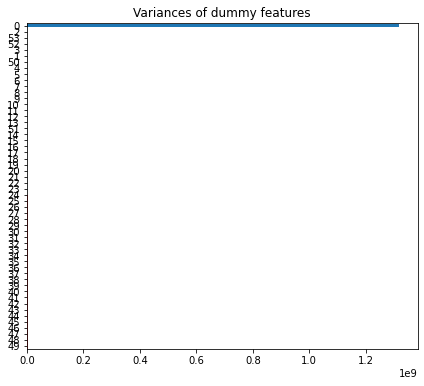

In [26]:
variances = pd.Series(X.var(axis=0)) #дисперсию вдоль указанной оси.
fig, ax = plt.subplots(figsize=(7,6))
variances.sort_values().plot(kind='barh', ax=ax)
ax.vlines(0.1, ymin=-1, ymax=25, colors='red')
ax.set_title('Variances of dummy features');
plt.show()

In [104]:
# Create the RFE object and rank each pixel
svc = SVR(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=5, step=1)
rfe.fit(X, y.ravel())
ranking = rfe.ranking_.reshape(X[0].shape)
print(ranking)  # ранжирование признаков 
print(rfe.support_) # массив, указыв. был выбран признак или нет
print(rfe.ranking_) #
print(rfe.n_features_) #



[ 1  3  1  2  5  4 12 14  9  7  8 10 11 13 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 50
 49 48  1  6  1  1]
[ True False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False  True  True]
[ 1  3  1  2  5  4 12 14  9  7  8 10 11 13 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 50
 49 48  1  6  1  1]
5


In [28]:
# Create the RFE object and compute a cross-validated score.
svc = SVR(kernel="linear")


In [99]:
min_features_to_select = 5  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=KFold(n_splits=5),
    scoring="r2",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y.ravel())

RFECV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
      estimator=SVR(C=1, kernel='linear'), min_features_to_select=5,
      scoring='r2')

In [106]:
rfecv.fit(x_train, y_train.ravel())

RFECV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
      estimator=SVR(C=1, kernel='linear'), min_features_to_select=5,
      scoring='r2')

In [100]:
print(rfecv.ranking_)  # ранжирование признаков 
print(rfecv.support_) # массив, указыв. был выбран признак или нет
# print(rfe.ranking_) #
# print(rfe.n_features_) #

[ 1  3  1  2  5  4 12 14  9  7  8 10 11 13 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 50
 49 48  1  6  1  1]
[ True False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False  True  True]


In [107]:
print(rfecv.ranking_)  # ранжирование признаков 
print(rfecv.support_) 

[ 1  3  1  2  5  4 12 14  9  7  8 10 11 13 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 50
 49 48  1  6  1  1]
[ True False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False  True  True]


In [108]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 5


In [109]:
rfecv.grid_scores_  # представьте баллы перекрестной валидации

array([-0.0769981, -0.0769981, -0.0769981, -0.0769981, -0.0769981,
       -0.0769981, -0.0769981, -0.0769981, -0.0769981, -0.0769981,
       -0.0769981, -0.0769981, -0.0769981, -0.0769981, -0.0769981,
       -0.0769981, -0.0769981, -0.0769981, -0.0769981, -0.0769981,
       -0.0769981, -0.0769981, -0.0769981, -0.0769981, -0.0769981,
       -0.0769981, -0.0769981, -0.0769981, -0.0769981, -0.0769981,
       -0.0769981, -0.0769981, -0.0769981, -0.0769981, -0.0769981,
       -0.0769981, -0.0769981, -0.0769981, -0.0769981, -0.0769981,
       -0.0769981, -0.0769981, -0.0769981, -0.0769981, -0.0769981,
       -0.0769981, -0.0769981, -0.0769981, -0.0769981, -0.0769981])

In [116]:
scores = cross_validate(rfecv, X, y.ravel(), cv = 3,
                        scoring = ('r2', 'neg_mean_squared_error'),
                        return_train_score = True)
print(scores['test_neg_mean_squared_error'])
print(scores['train_r2'])

[-1.6171160e+47 -2.4892276e+31 -1.4739565e+31]
[-0.13156996 -0.12342697 -0.12342697]


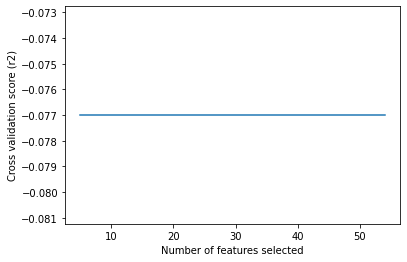

In [110]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (r2)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [36]:
# # Создатьобъект RFE и ранг каждого пикселя
# svc1= SVC(kernel="linear", C=1)
# rfe1 = RFE(estimator=svc, n_features_to_select=1, step=1)
# rfe1.fit(X, y.ravel())
# ranking1 = rfe1.ranking_.reshape(y.shape)

# # Plot pixel ranking
# plt.matshow(ranking1, cmap=plt.cm.Blues)
# plt.colorbar()
# plt.title("Ранжирование пикселей с помощью RFE")
# plt.show()

# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py